## Predicting Passenger Survival on the Titanic Using Machine Learning

- Objective:  
To develop a supervised machine learning model that accurately predicts whether a passenger aboard the Titanic survived or not, based on available features such as age, sex, ticket class, and more.

- Problem Statement:  
The sinking of the Titanic is one of the most infamous shipwrecks in history. While there were a limited number of lifeboats, survival was influenced by several factors such as age, sex, and socio-economic status.
  
- Goal:  
> - To analyze the Titanic dataset from Kaggle and build a classification model that can predict survival outcomes of passengers using relevant features. This involves understanding the key factors affecting survival and applying machine learning techniques for predictive accuracy.

- Methodology:  
> - Step 1: Data Exploration & Preprocessing  
> - Load and inspect the dataset (train.csv and test.csv)  
> - Handle missing data (e.g., imputing missing Age and Embarked values)  
> - Convert categorical variables (e.g., Sex, Embarked) into numeric form  
> - Feature engineering (e.g., creating FamilySize, extracting titles from names)  
> - Normalize or scale data if necessary  

- Step 2: Exploratory Data Analysis (EDA) 
> - Use visualizations (e.g., bar plots, histograms) to understand feature distributions and correlations with survival
> - Identify important features affecting survival

- Step 3: Model Building
> - Split data into training and validation sets
- Train and evaluate several classification algorithms:
> - Logistic Regression
> - Decision Tree
> - Random Forest
> - Support Vector Machine (SVM)
> - K-Nearest Neighbors (KNN)
> - XGBoost or Gradient Boosting

- Use cross-validation to prevent overfitting

- Step 4: Model Evaluation
- Compare models using metrics like:
> - Accuracy
> - Precision
> - Recall
> - F1-Score
> - ROC-AUC

- Select the best performing model  

- Step 5: Model Deployment (Optional)  
> - Predict survival on the test dataset

In [3]:
#Install the libraries

!pip install pandas numpy matplotlib seaborn scikit-learn

  Using cached pandas-2.3.1-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached numpy-2.3.1-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached matplotlib-3.10.3-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached scikit_learn-1.7.0-cp312-cp312-win_amd64.whl.metadata (14 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.2-cp312-cp312-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.58.5-cp312-cp312-win_amd64.whl.metadata (109 kB)
  Using cached kiwisolver-1.4.8-cp312-cp312-win_amd64.whl.metadata (6.3 kB)
  Using cached pillow-11.3.0-cp312-cp312-win_amd64.whl.metadata (9.2 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
  Using cached scipy-1.16.0-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [66]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [5]:
#Load the dataset
data = pd.read_csv(r'C:\Users\NGARE\DS_Python_Lux\Ds_projects\Titanic-Machine-Learning-Model\train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Univariate analysis and data cleaning

In [6]:
#make a copy of the data

df = data.copy()

In [7]:

#Get the shape of data
df.shape

#The dataset has 891 columns and 12 rows

(891, 12)

In [8]:
# check datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
# Check for duplicates

df.duplicated().sum()

#No duplicates

np.int64(0)

In [10]:
# checking for the distribution of object variables

df.describe(include='object').T


,count,unique,top,freq
Name,891,891,"Braund, Mr. Owen Harris",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Cabin,204,147,G6,4
Embarked,889,3,S,644


In [11]:
# Checking for distribution of numerical variables

df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [12]:
#Checking for nulls

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
df.columns = df.columns.str.lower()
df.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          714 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  cabin        204 non-null    object 
 11  embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
numerical_cols = df.drop(columns = ['name', 'sex', 'ticket', 'cabin', 'embarked'], axis = 0)
cat_cols = ['name', 'sex', 'ticket', 'cabin', 'embarked']

numerical_cols = list(df.select_dtypes(include=['int64', 'float64']).columns)


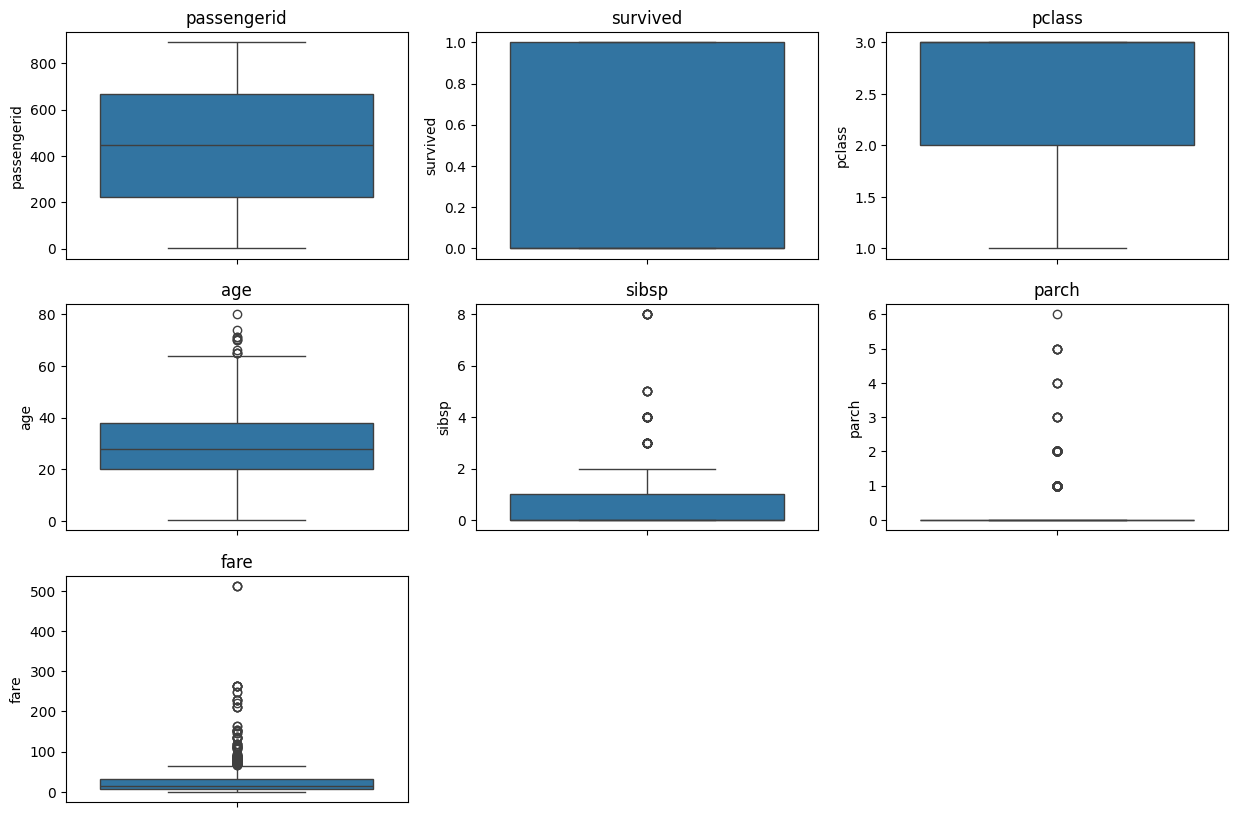

In [16]:
#Checking for outliers

plt.figure(figsize = (15,10))
for i in range(len(numerical_cols)):
    plt.subplot(3,3,i+1)
    sns.boxplot(y=numerical_cols[i], data = df)
    plt.title(numerical_cols[i])
plt.tight_layout
plt.show()


In [21]:
# Treating outliers
Q1 = df[numerical_cols].quantile(0.25)
Q2 = df[numerical_cols].quantile(0.50)
Q3 = df[numerical_cols].quantile(0.75)

#Calculate IRC 
IRQ = Q3 - Q1

lower_bound  = Q1 - 1.5*IRQ
upper_bound = Q3 + 1.5*IRQ

#Detect outliers

outliers = df[((df[numerical_cols] < lower_bound) | (df[numerical_cols] > upper_bound)).any(axis=1)]
print(outliers.shape[0])

293


In [24]:
#Impute outliers with the median
for col in numerical_cols:
    median = Q2[col]
    low = lower_bound[col]
    high = upper_bound[col]
    
    df.loc[df[col] < low, col] = median
    df.loc[df[col] > high, col] = median


In [25]:
#Checking the number or rows containing outliers
outliers = df[((df[numerical_cols] < lower_bound) | (df[numerical_cols] > upper_bound)).any(axis=1)]
print(outliers.shape[0])

0


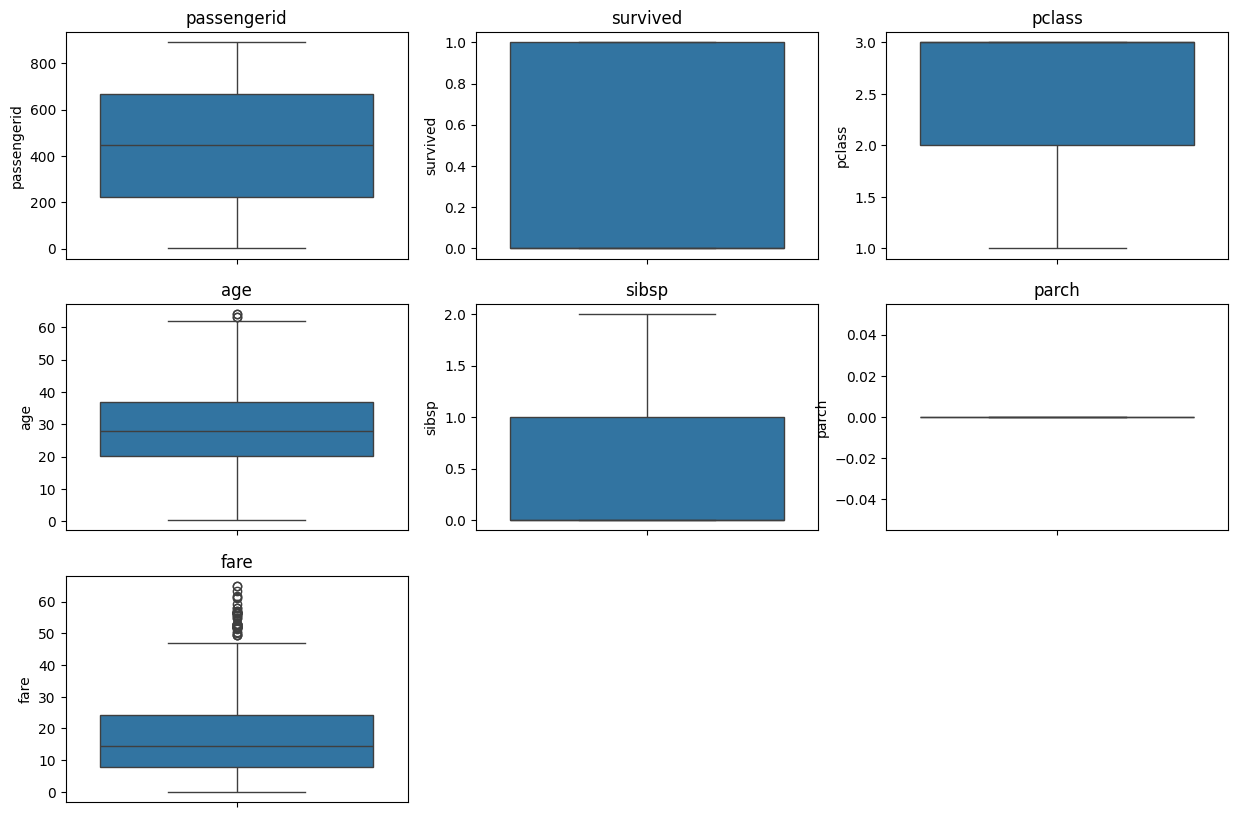

In [26]:
#Checking for outliers post treatment

plt.figure(figsize = (15,10))
for i in range(len(numerical_cols)):
    plt.subplot(3,3,i+1)
    sns.boxplot(y=numerical_cols[i], data = df)
    plt.title(numerical_cols[i])
plt.tight_layout
plt.show()


In [27]:
df.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [29]:
df = df.drop(['passengerid','name', 'ticket', 'cabin' ], axis = 1)

In [30]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked'],
      dtype='object')

In [31]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,14.4542,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [39]:
#Check for missing values
df.isnull().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
dtype: int64

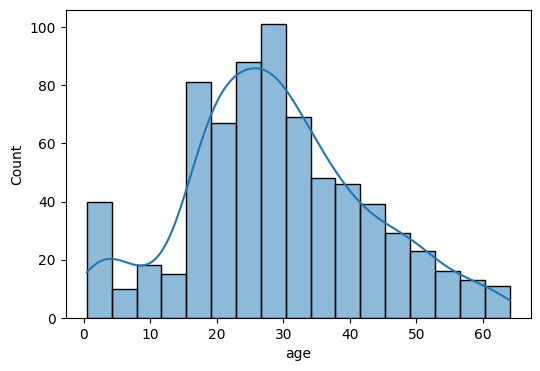

In [40]:
plt.figure(figsize = (6,4))
sns.histplot(df['age'], kde = True)
plt.show()

In [41]:
# Filling the age column with median

df['age'] = df['age'].fillna(median)

In [43]:
mod = df['embarked'].mode()
df['embarked'] = df['embarked'].fillna(mod[0])

In [44]:
df.isnull().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

### Explaratory Data Analysis


In [45]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked'],
      dtype='object')

survived  pclass
0         3         372
          2          97
          1          80
1         1         136
          3         119
          2          87
Name: count, dtype: int64


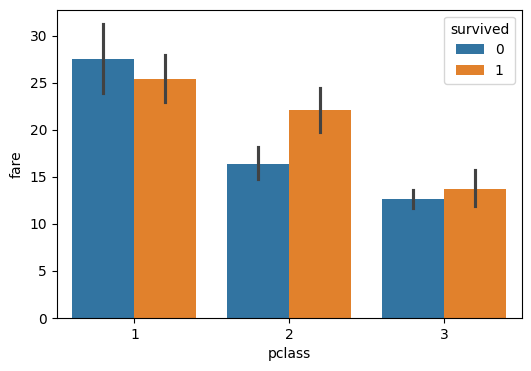

In [55]:
pcl = df.groupby('survived')['pclass'].value_counts()
print(pcl)

plt.figure(figsize=(6,4))
sns.barplot(x = 'pclass', y = 'fare', hue = 'survived',data = df)
plt.show()

In [58]:
df.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,14.4542,C


In [60]:
col = df.select_dtypes(include = 'object')

le = LabelEncoder()
for i in col:
    df[i] = le.fit_transform(df[i])

In [62]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,14.4542,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [65]:
# split data into x and y 

x = df.drop(columns = 'survived', axis= 0)
y = df['survived']

x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)
#scale the data

s = StandardScaler()
x_train_scaled = s.fit_transform(x_train)
x_test_scaled = s.transform(x_test)

In [71]:
# Hyperparameter tuning
model = LogisticRegression()
param_grid = {
    'C': [0.0001, 0.001, 0.01, 0.1, 10, 100, 1000],
    'penalty': ['l1', 'l2','elasticnet', None],
    'solver': ['liblinear', 'saga', 'sag']
}

#Grid search with 5 folds

grid_cv = GridSearchCV(model, param_grid, cv=5,scoring='accuracy')

# Fit the model

grid_cv.fit(x_train_scaled, y_train)

#best hyperparameters

print(f'Best parameters: {grid_cv.best_params_}')
print(f'Best scoring {grid_cv.best_score_}')

c:\Users\NGARE\DS_Python_Lux\Ds_projects\Titanic-Machine-Learning-Model\titanic\Lib\site-packages\sklearn\linear_model\_logistic.py:1224: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\NGARE\DS_Python_Lux\Ds_projects\Titanic-Machine-Learning-Model\titanic\Lib\site-packages\sklearn\linear_model\_logistic.py:1224: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\NGARE\DS_Python_Lux\Ds_projects\Titanic-Machine-Learning-Model\titanic\Lib\site-packages\sklearn\linear_model\_logistic.py:1224: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\NGARE\DS_Python_Lux\Ds_projects\Titanic-Machine-Learning-Model\titanic\Lib\site-packages\sklearn\linear_model\_logistic.py:1224: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\NGARE\DS_Python_Lux\Ds_projects\Titanic-Machine-Learning-Model\tita

Best parameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Best scoring 0.7878755047769133


c:\Users\NGARE\DS_Python_Lux\Ds_projects\Titanic-Machine-Learning-Model\titanic\Lib\site-packages\sklearn\linear_model\_logistic.py:1224: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\NGARE\DS_Python_Lux\Ds_projects\Titanic-Machine-Learning-Model\titanic\Lib\site-packages\sklearn\linear_model\_logistic.py:1224: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\NGARE\DS_Python_Lux\Ds_projects\Titanic-Machine-Learning-Model\titanic\Lib\site-packages\sklearn\linear_model\_logistic.py:1224: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\NGARE\DS_Python_Lux\Ds_projects\Titanic-Machine-Learning-Model\titanic\Lib\site-packages\sklearn\linear_model\_logistic.py:1224: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\NGARE\DS_Python_Lux\Ds_projects\Titanic-Machine-Learning-Model\tita

In [72]:

logir = LogisticRegression(max_iter=200, C = 0.01, penalty = 'l1', solver = 'liblinear')

model = logir.fit(x_train_scaled, y_train)
y_pred = model.predict(x_test_scaled)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       105
           1       0.75      0.70      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179

